# Ciencia de datos: 

## Descripción del dataset 


* **SalePrice** - El precio en dólares de la casa.

* **OverallQual**: Calidad general del material y acabado, califica el material general y el acabado de la casa

  - 10	Muy Excelente
  - 9	Excelente
  - 8	Muy Bueno
  - 7	Bueno
  - 6	Sobre el promedio
  - 5	Promedio
  - 4	Abajo del promedio
  - 3	Justo
  - 2	Pobre
  - 1	Muy Pobre


* **1stFlrSF**: Pies cuadrados del primer piso
* **TotRmsAbvGrd**: Total habitaciones sobre rasante (no incluye baños)
* **YearBuilt**: Fecha original de construcción
* **LotFrontage**: Pies lineales de calle conectados a la propiedad


In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as skLinearRegression

SALES_PRICE = "SalePrice"
OVERALL_QUAL = "OverallQual"
FIRST_FLOOR_SQUARE_FEET = "1stFlrSF"
TOTAL_ROOMS = "TotRmsAbvGrd"
YEAR_BUILT = "YearBuilt"
LINEAR_FEET_OF_STREET = "LotFrontage"
ONES = "Ones"


## Carga del dataset

Carga del dataset `dataset.py` y creación del Data Frame 

In [2]:

dataset = np.load('dataset.npy')

data_frame = pd.DataFrame(data=dataset, columns=[SALES_PRICE, OVERALL_QUAL, FIRST_FLOOR_SQUARE_FEET, TOTAL_ROOMS, YEAR_BUILT, LINEAR_FEET_OF_STREET])


## Análisis Exploratorios 


### Media

In [3]:

print(data_frame.mean(axis=0))

SalePrice       180921.195890
OverallQual          6.099315
1stFlrSF          1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64


### Máximos

In [4]:
print(data_frame.max(axis=0))

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


### Mínimos 

In [5]:
print(data_frame.min(axis=0))

SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64


### Desviación Estándar

In [6]:
print(data_frame.std(axis=0))

SalePrice       79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64


## Histogramas

### Histograma de Precio de Ventas

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

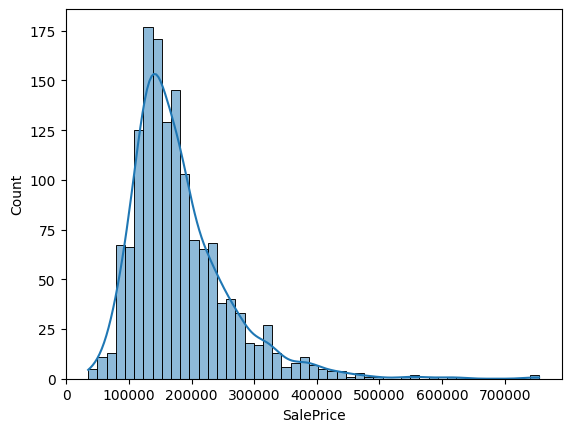

In [11]:
sns.histplot(data=data_frame, x=SALES_PRICE,  kde=True)

### Histrograma Calidad de los Materiales

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

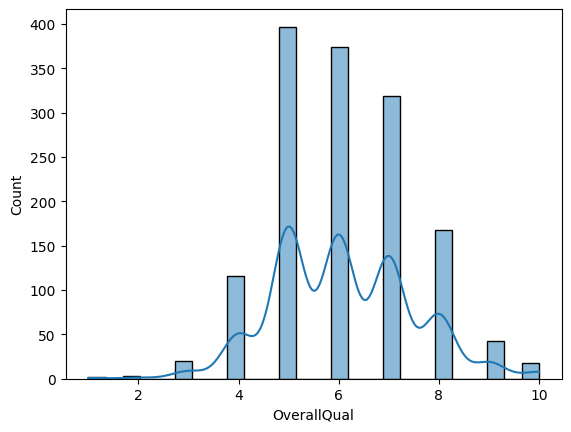

In [12]:
sns.histplot(data=data_frame, x=OVERALL_QUAL, kde=True)

### Historama Pies cuadrados del primer piso

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

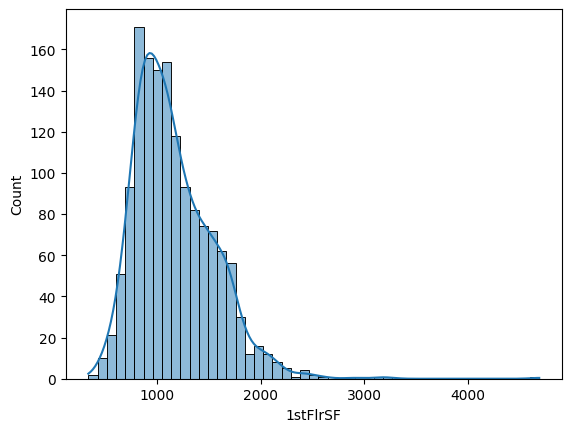

In [13]:
sns.histplot(data=data_frame, x=FIRST_FLOOR_SQUARE_FEET, kde=True)

### Histograma del total de cuartos

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

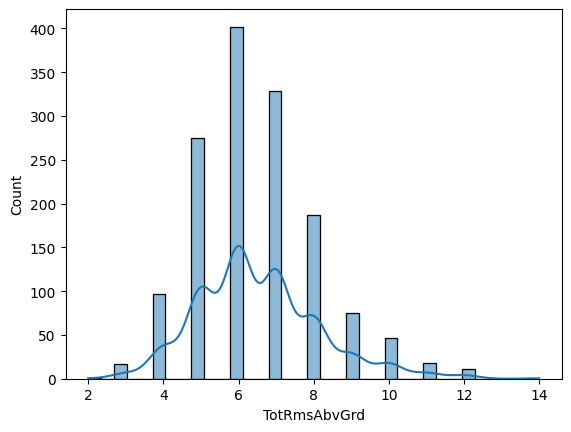

In [16]:
sns.histplot(data=data_frame, x=TOTAL_ROOMS, kde=True)

### Histograma año de construcción

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

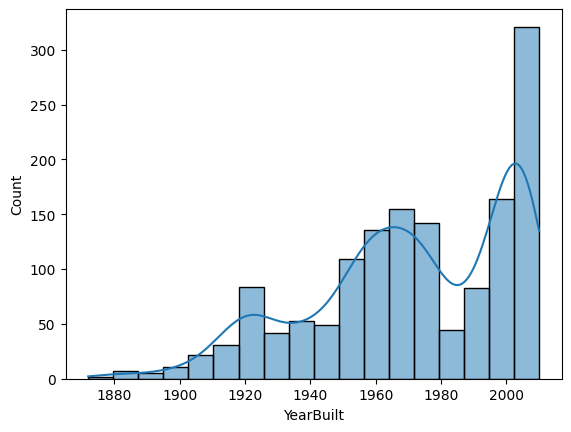

In [17]:
sns.histplot(data=data_frame, x=YEAR_BUILT, kde=True)

### Histograma pies lineales de calle conectados a la propiedad

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

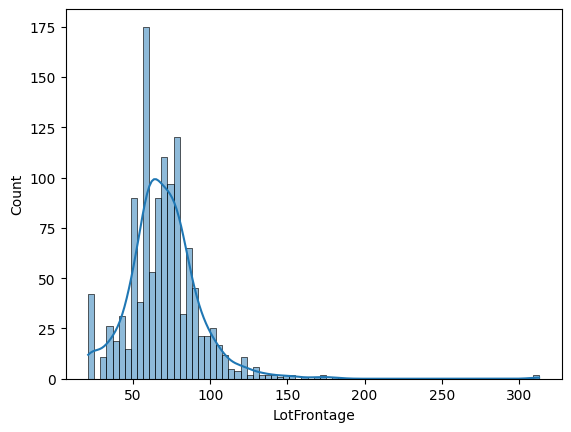

In [18]:
sns.histplot(data=data_frame, x=LINEAR_FEET_OF_STREET, kde=True)

## Correlacion de los datos

In [27]:
data_frame.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


---

## Modelo de Regresión Lineal

$y = \beta_0 + \beta_1 ∗ x$

Donde: 

- $y$ es la variable dependiente
- $x$ es la variable independiente 
- $\beta_0$ es el intercepto de la recta
- $\beta_1$ es la pendiente de la recta.

### Descripción del algoritmo: 

- $\alpha$ es el factor de la tasa  de aprendizaje `learning_rate`
- `eponch` es el numero de iteracciones 
- $b, (\beta_0)$ es el sesgo o el intercepto de la recta
- $w, (\beta_1)$ es la matriz de pesos, la pendiente de la recta 


1. Inicializar en cero la matriz de pesos $w, (\beta_1)$ y el intercepto de la recta $b, (\beta_0)$  

2. Calcular la predicción de la variable dependiente: 

$$\hat{y} = w x + b$$

3. Verificar si la iteracción es multiplo del parámetro de impresión 'print_error_each'

4. Calcular el error $ \epsilon = \frac{1}{2n}\sum^{n}_{i=1}(y − \hat{y})^2$
   1. Definir una funcion MSE que lo calcula de forma vectorial 

   $$MSE = J(w, b) = \frac{1}{N} \sum^{n}_{i=1}(y_i - (wx_i + b))^2$$ 

   $$MSE = J(w, b) = \frac{1}{N} \sum^{n}_{i=1}(y_i - \bar{y})^2$$

   $$MSE = Media ((y_i - \bar{y})^2) $$

5. Calcular el gradiente del error respecto de cada parametro con las expresiones:

   $$J'(w, b) = \left[ \frac{df}{dw}\atop{\frac{df}{db}} \right] = \left[ {\frac{1}{n}\sum^{n}_{i=1}(x_i)(\hat{y} - y)} \atop {\frac{1}{n}\sum^{n}_{i=1}(\hat{y} - y)} \right] $$ 

6. Actualizar el intercepto y la matriz de pesos

$$b = b - \alpha \cdot db$$

$$w = w - \alpha \cdot dw$$


7. Repedir los pasos el numero de interaciones 



In [19]:
class LinearRegression():

  def __init__(self, learning_rate = 0.0001, epochs = 1000, print_error_each = 100):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.print_error_each = print_error_each
    self.weights = None
    self.bias = None
    self.errors = []
    self.X = None
    self.y = None
    self.y_predicts = []


  def fit(self, X, y):
    
    samples_number, features_number = X.shape
    self.weights = np.zeros(features_number)
    
    self.bias = 0
    self.errors = []
    self.X = X
    self.y = y

    for epoch in range(self.epochs) : 

      y_predicted = np.dot(X, self.weights) + self.bias
      self.y_predicts.append(y_predicted)

      if (epoch + 1) % self.print_error_each == 0: 
        error = self.mse(y, y_predicted)
        self.errors.append(error)

      dw = (1/samples_number) * np.dot(X.T, (y_predicted - y))
      db = (1/samples_number) * np.sum(y_predicted - y) 

      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias
  
  def mse(self, y, predictions):
    return np.mean((y-predictions)**2)
  

  def graph_errors(self):
    x = list(range(self.print_error_each, self.epochs + self.print_error_each, self.print_error_each))
    plt.scatter(x, self.errors)
    plt.show()


  def plot_model_progress(self, n):

    data_frames = []
    keys = []

    x = self.X[:,0]

    data_frame = pd.DataFrame({'x': x, 'y': self.y})
    sns.scatterplot(x=data_frame.x, y=data_frame.y)

    for epoch in range(n, self.epochs + n, n) :
      prediction = self.y_predicts[epoch - 1]
    
      data_frame = pd.DataFrame({'x': x, 'y': prediction})
      data_frames.append(data_frame)
      keys.append(f'Attempt: {epoch}')
  
      
    y = pd.concat(data_frames, axis=0, keys=keys).reset_index()
    y = y.rename(columns={'level_0': 'predictions'})
    
    sns.lineplot(data=y, x='x', y='y', hue='predictions')

### Predicción General y Cálculo del error

In [20]:
def predict(model , sk_model, X):
  predictions = model.predict(X)
  sk_predictions = sk_model.predict(X)

  average_predictions = 0.5 * (predictions +  sk_predictions)

  return predictions, sk_predictions, average_predictions

def mse(y, predictions):
  return np.mean((y-predictions)**2)

## Limpieza de los datos

Los datos que contengan nulos se eliminarán del dataset

In [256]:
dataset = data_frame.dropna()
dataset.shape

(1201, 6)

## Separación de los datos

1. Cálcular el 80% del tamaño del dataset


In [257]:
length = len(dataset)
print(length) 
training_dataset_len = length * 80 // 100

1201


2. Revolver los datos antes de realizar la separación de los datos 

In [258]:
dataset = dataset.sample(frac=1)
dataset[ONES] = np.ones(dataset.shape[0])

3. Los datos se separarán en dos partes una con el 80% de los datos los cuales serán usados como datos de entrenamiento y la parte del 20% será tomada como el set de validación de los datos. 

- Datos de entrenamiento

In [259]:
training_dataset = dataset[:training_dataset_len]
print(training_dataset.shape)

(960, 7)


- Datos de validación 

In [260]:
test_dataset = dataset[training_dataset_len : ]
print(test_dataset.shape)

(241, 7)


## Variable Dependiente (Y)

### Variable Dependiente (SalesPrice) 

La variable dependiente es el precio de venta 

In [263]:
training_y = training_dataset[SALES_PRICE]
test_y = test_dataset[SALES_PRICE]

## Variables Independientes

### Variable Independiente (OverallQual)

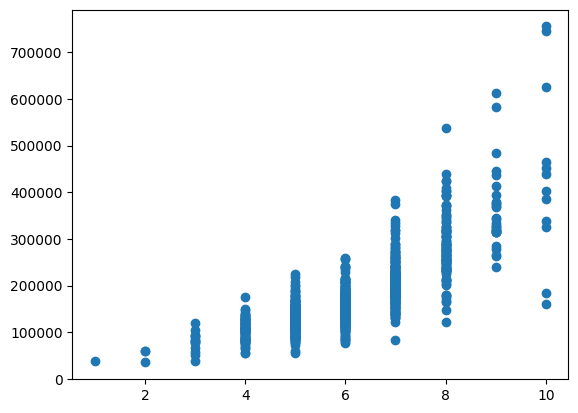

In [264]:
training_X_overall = training_dataset[[OVERALL_QUAL, ONES]].to_numpy()
test_X_overall = test_dataset[[OVERALL_QUAL, ONES]].to_numpy()
plt.scatter(training_X_overall.T[0], training_y)
plt.show()


#### Entrenamiento del modelo para (OverallQual)

In [265]:
model_overall =  LinearRegression()
sk_model_overall = skLinearRegression()

model_overall.fit(training_X_overall, training_y)
sk_model_overall.fit(training_X_overall, training_y)


LinearRegression()

#### Gráfica de Errores (OverallQual)

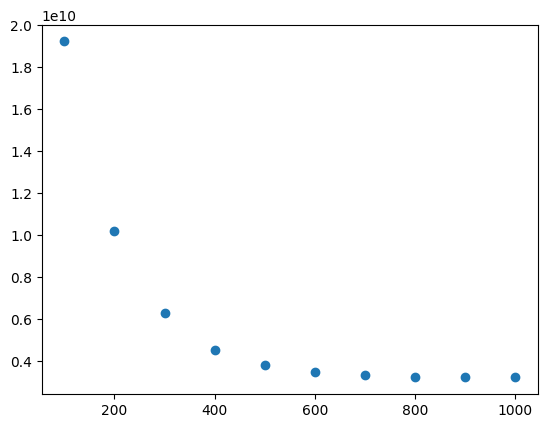

In [266]:
model_overall.graph_errors()

#### Gráfica de los intentos (OverallQual)

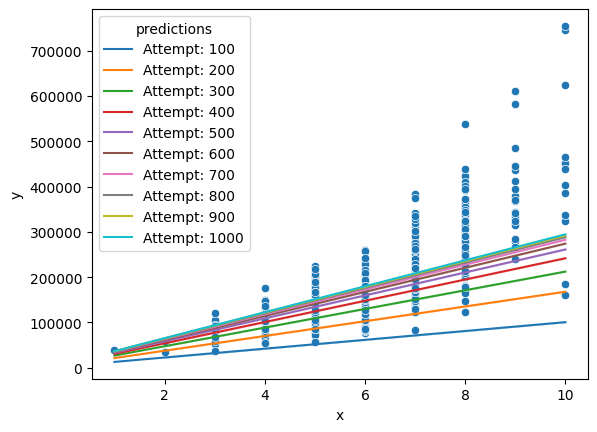

In [267]:
model_overall.plot_model_progress(100)

#### Diferencias de Error para (OverallQual)

In [268]:

predictions, sk_predictions, average_predictions = predict(model_overall, sk_model_overall, test_X_overall)

error_overall = mse(test_y, predictions)
print(error_overall)

sk_error_overall = mse(test_y, sk_predictions)
print(sk_error_overall)

avg_error_overall = mse(test_y, average_predictions)
print(avg_error_overall)

3078650222.0008693
2184648345.2134256
2459410916.2371855


### Variable Independiente (1stFlrSF)

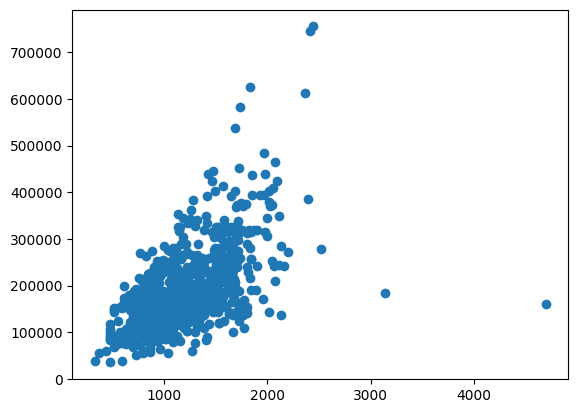

In [269]:
training_X_1stFlrSF = training_dataset[[FIRST_FLOOR_SQUARE_FEET, ONES]].to_numpy()
test_X_1stFlrSF  = test_dataset[[FIRST_FLOOR_SQUARE_FEET, ONES]].to_numpy()
plt.scatter(training_X_1stFlrSF.T[0], training_y)
plt.show()

#### Entrenamiento del modelo para (1stFlrSF)

In [270]:
model_1stFlrSF =  LinearRegression(learning_rate=0.000001,epochs=1000, print_error_each=100)
sk_model_1stFlrSF = skLinearRegression()

model_1stFlrSF.fit(training_X_1stFlrSF, training_y)
sk_model_1stFlrSF.fit(training_X_1stFlrSF, training_y)


LinearRegression()

#### Gráfica de Errores (1stFlrSF) 

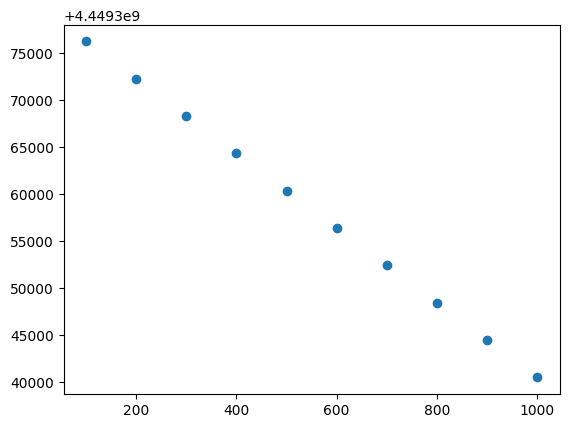

In [271]:
model_1stFlrSF.graph_errors()

#### Gráfica de Intentos (1stFlrSF)

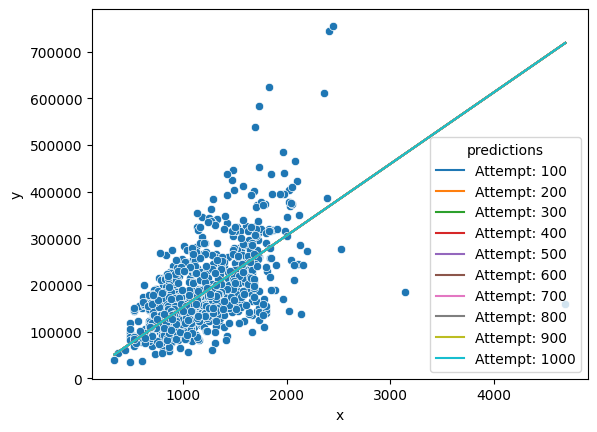

In [272]:
model_1stFlrSF.plot_model_progress(100)

#### Diferencias de Error para (1stFlrSF)

In [273]:
predictions, sk_predictions, average_predictions = predict(model_1stFlrSF, sk_model_1stFlrSF, test_X_1stFlrSF)

error_1stFlrSF = mse(test_y, predictions)
print(error_1stFlrSF)

sk_error_1stFlrSF = mse(test_y, sk_predictions)
print(sk_error_1stFlrSF)

avg_error_1stFlrSF = mse(test_y, average_predictions)
print(avg_error_1stFlrSF)

3916181666.022158
3997113816.3609605
3932701553.131223


### Variable Independiente (TotRmsAbvGrd)

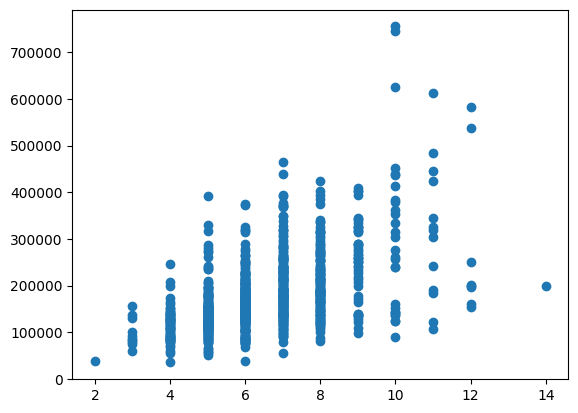

In [274]:
training_X_TotRmsAbvGrd = training_dataset[[TOTAL_ROOMS, ONES]].to_numpy()
test_X_TotRmsAbvGrd   =  test_dataset[[TOTAL_ROOMS, ONES]].to_numpy()
plt.scatter(training_X_TotRmsAbvGrd.T[0], training_y)
plt.show()

#### Entrenamiento del modelo para (TotRmsAbvGrd)

In [275]:
model_TotTomsAbvGrd =  LinearRegression()
sk_model_TotTomsAbvGrd = skLinearRegression()

model_TotTomsAbvGrd.fit(training_X_TotRmsAbvGrd, training_y)
sk_model_TotTomsAbvGrd.fit(training_X_TotRmsAbvGrd, training_y)

LinearRegression()

#### Gráfica de Erroes (TotRmsAbvGrd)

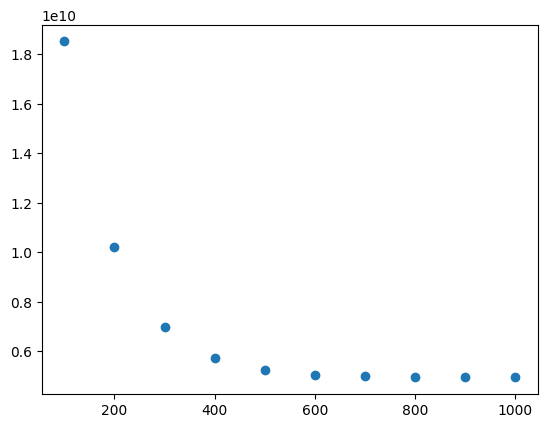

In [276]:
model_TotTomsAbvGrd.graph_errors()

#### Gráfica de Intentos (TotRmsAbvGrd)

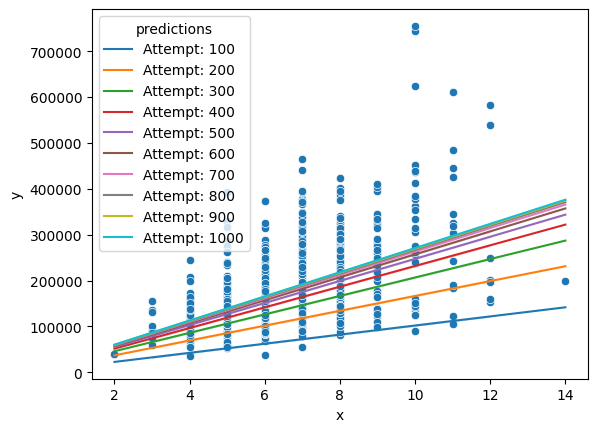

In [277]:
model_TotTomsAbvGrd.plot_model_progress(100)

#### Diferencias de Error para (TotRmsAbvGrd)

In [279]:
predictions, sk_predictions, average_predictions = predict(model_TotTomsAbvGrd, sk_model_TotTomsAbvGrd, test_X_TotRmsAbvGrd)

error_TotRmsAbvGrd = mse(test_y, predictions)
print(error_TotRmsAbvGrd)

sk_error_TotRmsAbvGrd = mse(test_y, sk_predictions)
print(sk_error_TotRmsAbvGrd)

avg_error_TotRmsAbvGrd = mse(test_y, average_predictions)
print(avg_error_TotRmsAbvGrd)


5027197520.139677
5023086721.489108
5024405646.054418


### Variable Independiente (YearBuilt)

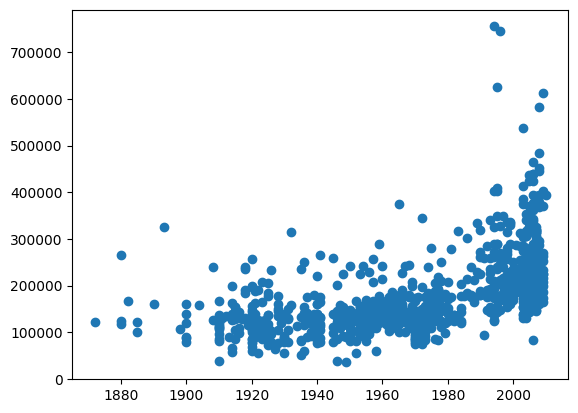

In [280]:
training_X_YearBuilt = training_dataset[[YEAR_BUILT, ONES]].to_numpy()
test_X_YearBuilt = test_dataset[[YEAR_BUILT, ONES]].to_numpy()
plt.scatter(training_X_YearBuilt.T[0], training_y)
plt.show()

#### Entrenamiento del modelo para (YearBuilt)

In [281]:

model_YearBuilt =  LinearRegression(learning_rate=0.0000001)
sk_model_YearBuilt = skLinearRegression()

model_YearBuilt.fit(training_X_YearBuilt, training_y)
sk_model_YearBuilt.fit(training_X_YearBuilt, training_y)

LinearRegression()

#### Gráfica de Erroes (YearBuilt)

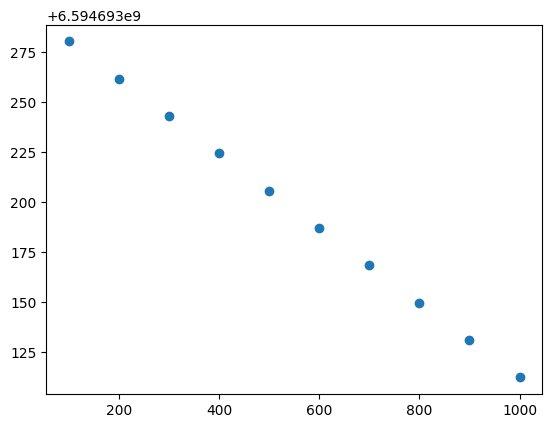

In [282]:
model_YearBuilt.graph_errors()

#### Gráfica de Intentos (YearBuild)

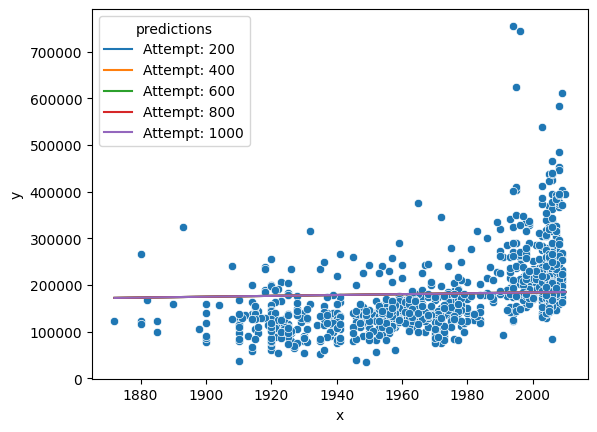

In [283]:
model_YearBuilt.plot_model_progress(200)

#### Diferencias de Error para (YearBuild)

In [285]:
predictions, sk_predictions, average_predictions = predict(model_YearBuilt, sk_model_YearBuilt, test_X_YearBuilt)

error_YearBuilt = mse(test_y, predictions)
print(error_TotRmsAbvGrd)

sk_error_YearBuilt = mse(test_y, sk_predictions)
print(sk_error_YearBuilt)

avg_error_YearBuilt = mse(test_y, average_predictions)
print(avg_error_YearBuilt)

5027197520.139677
5642957066.130752
5855030981.728317


### Variable Independiente (LotFrontage)

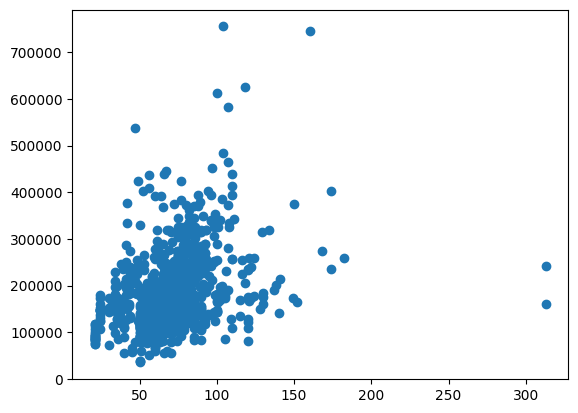

In [287]:
training_X_LotFrontage = training_dataset[[LINEAR_FEET_OF_STREET, ONES]].to_numpy()
test_X_LotFrontage =  test_dataset[[LINEAR_FEET_OF_STREET, ONES]].to_numpy()
plt.scatter(training_X_LotFrontage.T[0], training_y)
plt.show()

#### Entrenamiento del modelo para(LotFrontage)

In [289]:
model_LotFrontage =  LinearRegression()
sk_model_LotFrontage = skLinearRegression()
model_LotFrontage.fit(training_X_LotFrontage, training_y)
sk_model_LotFrontage.fit(training_X_LotFrontage, training_y)

LinearRegression()

#### Gráfica de Errores (LotFrontage) 

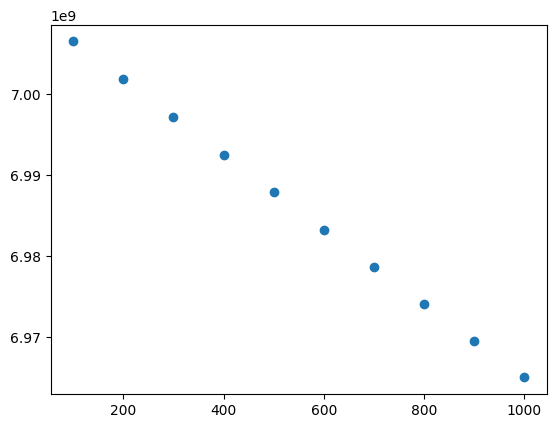

In [290]:
model_LotFrontage.graph_errors()

#### Gráfica de Intentos (LotFrontage) 

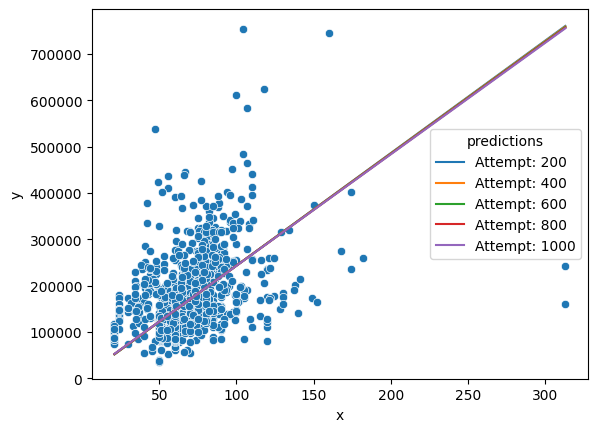

In [291]:
model_LotFrontage.plot_model_progress(200)

#### Diferencia de error para (LotFrontage)

In [293]:
predictions, sk_predictions, average_predictions = predict(model_LotFrontage, sk_model_LotFrontage, test_X_LotFrontage)

error_LotFrontage = mse(test_y, predictions)
print(error_TotRmsAbvGrd)

sk_error_LotFrontage = mse(test_y, sk_predictions)
print(sk_error_LotFrontage)

avg_error_LotFrontage = mse(test_y, average_predictions)
print(avg_error_LotFrontage)

5027197520.139677
6604668273.098025
6762443834.438061
